## Machine Learnining: Lab and HW 10
### Homework Tasks:
* Plot the error
* Model XOR with the help of sigmoid, linear
* Add moments rule to learning equation


In [2]:
import numpy as np

k = 1
def sigmoid(x):
    return 1.0/(1.0 + np.exp(-k*x))

def sigmoid_prime(x):
    return sigmoid(x)*(1.0-sigmoid(x))

def tanh(x):
    return np.tanh(x)

def tanh_prime(x):
    return 1.0 - x**2

def linear(x):
    return x

def linear_prime(x):
    return 1


[[ 0.88068662  0.54763037  0.44402657]
 [-0.76154831 -0.47597506 -0.99206685]
 [ 0.57783468  0.81975478 -0.10010443]]
[[ 0.83903798]
 [-0.92032391]
 [-0.32966092]]
[[-0.29993366  0.84517356  0.61157467]
 [-0.55657045 -0.73135239  0.51090344]
 [ 0.79721409 -0.23021564  0.28448156]]
[[-0.06950781]
 [ 0.11783672]
 [ 0.7622502 ]]
[[ 0.48131448 -0.48483598 -0.17772373]
 [ 0.22950177  0.03357372  0.8955804 ]
 [ 0.43191651  0.81860984 -0.26741128]]
[[0.94905775]
 [0.23504945]
 [0.60584501]]
[0 0] [[-0.00346402]]
[0 1] [[-0.16285465]]
[1 0] [[0.1956209]]
[1 1] [[0.03814604]]
epochs: 0
epochs: 10000
epochs: 20000
epochs: 30000
epochs: 40000
epochs: 50000
epochs: 60000
epochs: 70000
epochs: 80000
epochs: 90000
[0 0] [[2.07284378e-06]]
[0 1] [[0.99569445]]
[1 0] [[0.99716092]]
[1 1] [[-0.00200243]]


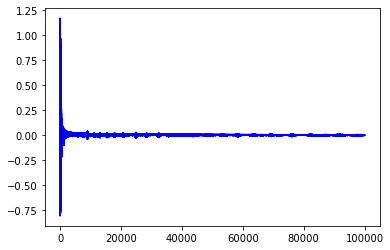

In [9]:
import numpy as np
import matplotlib.pyplot as plt


class NeuralNetwork:

    def __init__(self, layers, activation):
        
        if activation == 'tanh':
            self.activation = tanh
            self.activation_prime = tanh_prime
        
        elif activation == 'linear':    
            self.activation = linear
            self.activation_prime = linear_prime
            
        elif activation == 'sigmoid':
            self.activation = sigmoid
            self.activation_prime = sigmoid_prime
        
        # Set weights
        self.weights = []
        self.deltas = []
        # layers = [2,2,1]
        # range of weight values (-1,1)
        # input and hidden layers - random((2+1, 2+1)) : 3 x 3
        
        for i in range(1, len(layers) - 1):
            r = 2*np.random.random((layers[i-1] + 1, layers[i] + 1)) -1
            self.weights.append(r)
            print(r)
        # output layer - random((2+1, 1)) : 3 x 1
        r = 2*np.random.random( (layers[i] + 1, layers[i+1])) - 1
        print(r)
        self.weights.append(r)

    def fit(self, X, y, learning_rate=0.2, epochs=100000):
        # Add column of ones to X
        # This is to add the bias unit to the input layer
        ones = np.atleast_2d(np.ones(X.shape[0]))
        X = np.concatenate((ones.T, X), axis=1)
        error_g = []
        epochs_g = np.arange(epochs)
         
        for k in range(epochs):
            i = np.random.randint(X.shape[0])
            a = [X[i]]
            

            for l in range(len(self.weights)):
                    dot_value = np.dot(a[l], self.weights[l])
                    activation = self.activation(dot_value)
                    a.append(activation)
            # output layer
            error = y[i] - a[-1]
            error_g.append(error)
            deltas = [error * self.activation_prime(a[-1])]

            # we need to begin at the second to last layer 
            # (a layer before the output layer)
            for l in range(len(a) - 2, 0, -1): 
                deltas.append(deltas[-1].dot(self.weights[l].T)*self.activation_prime(a[l]))
            self.deltas.append(deltas)

            # reverse
            # [level3(output)->level2(hidden)]  => [level2(hidden)->level3(output)]
            deltas.reverse()

            # backpropagation
            # 1. Multiply its output delta and input activation 
            #    to get the gradient of the weight.
            # 2. Subtract a ratio (percentage) of the gradient from the weight.
            for i in range(len(self.weights)):
                layer = np.atleast_2d(a[i])
                delta = np.atleast_2d(deltas[i])
                self.weights[i] += learning_rate * layer.T.dot(delta)

            if k % 10000 == 0: 
                print('epochs:', k)
                
        plt.plot(epochs_g, error_g, color='b')
                
            

            

    def predict(self, x):
        #ones = np.atleast_2d(np.ones(x.shape[0]))
    
        a = np.concatenate((np.array([[1]]), np.array([x])), axis=1)    

        for l in range(0, len(self.weights)):
            a = self.activation(np.dot(a, self.weights[l]))
        return a
    
    def get_deltas(self):
        return self.deltas

if __name__ == '__main__':

    nn = NeuralNetwork([2,2,1], activation = 'tanh')
    X = np.array([[0, 0],
                  [0, 1],
                  [1, 0],
                  [1, 1]])
    y = np.array([0, 1, 1, 0])
#     X = np.array([[-1, -1],
#                   [-1, 1],
#                   [1, -1],
#                   [1, 1]])
#     y = np.array([0, 1, 1, 0])
    for e in X:
        print(e,nn.predict(e))
    nn.fit(X, y)
    
    for e in X:
        print(e,nn.predict(e))
        

[[ 0.8854245   0.1999864   0.54745805]
 [-0.16446531 -0.53079473 -0.03292906]
 [ 0.28962293  0.03319334 -0.46065865]]
[[ 0.67137179]
 [ 0.80492966]
 [-0.4175619 ]]
[0 0] [[0.65775931]]
[0 1] [[0.67793677]]
[1 0] [[0.62875249]]
[1 1] [[0.65040402]]
epochs: 0
epochs: 10000
epochs: 20000
epochs: 30000
epochs: 40000
epochs: 50000
epochs: 60000
epochs: 70000
epochs: 80000
epochs: 90000
[0 0] [[0.49998015]]
[0 1] [[0.4999997]]
[1 0] [[0.4999996]]
[1 1] [[0.49999999]]


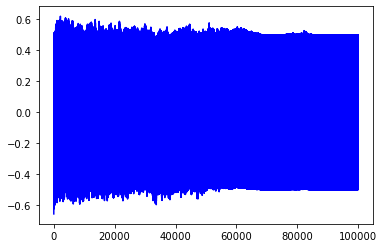

In [12]:
if __name__ == '__main__':

    nn1 = NeuralNetwork([2,2,1], activation = 'sigmoid')
    X = np.array([[0, 0],
                  [0, 1],
                  [1, 0],
                  [1, 1]])
    y = np.array([0, 1, 1, 0])
#     X = np.array([[-1, -1],
#                   [-1, 1],
#                   [1, -1],
#                   [1, 1]])
#     y = np.array([0, 1, 1, 0])
    for e in X:
        print(e,nn1.predict(e))
    nn1.fit(X, y)
    
    for e in X:
        print(e,nn1.predict(e))

[[-0.17114009  0.6184535  -0.48185037]
 [-0.84343574 -0.63585398  0.95352474]
 [ 0.0982457  -0.32987227  0.97459965]]
[[-0.39736545]
 [ 0.71686802]
 [ 0.81824665]]
[0 0] [[0.11708224]]
[0 1] [[0.63903081]]
[1 0] [[0.7766295]]
[1 1] [[1.29857806]]
epochs: 0
epochs: 10000
epochs: 20000
epochs: 30000
epochs: 40000
epochs: 50000
epochs: 60000
epochs: 70000
epochs: 80000
epochs: 90000
[0 0] [[0.46302521]]
[0 1] [[0.44544134]]
[1 0] [[0.63583171]]
[1 1] [[0.61824784]]


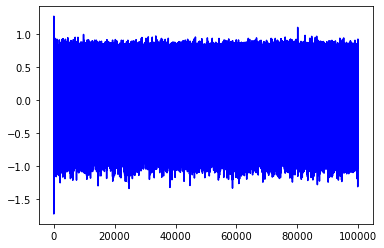

In [11]:
if __name__ == '__main__':

    nn2 = NeuralNetwork([2,2,1], activation = 'linear')
    X = np.array([[0, 0],
                  [0, 1],
                  [1, 0],
                  [1, 1]])
    y = np.array([0, 1, 1, 0])
#     X = np.array([[-1, -1],
#                   [-1, 1],
#                   [1, -1],
#                   [1, 1]])
#     y = np.array([0, 1, 1, 0])
    for e in X:
        print(e,nn2.predict(e))
    nn2.fit(X, y)
    
    for e in X:
        print(e,nn2.predict(e))